Dataset shape: (8807, 12)
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  

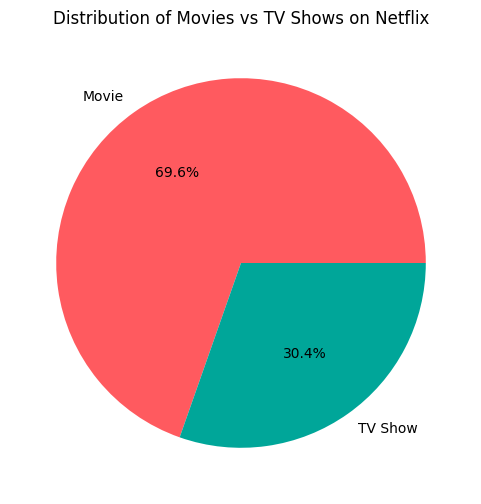

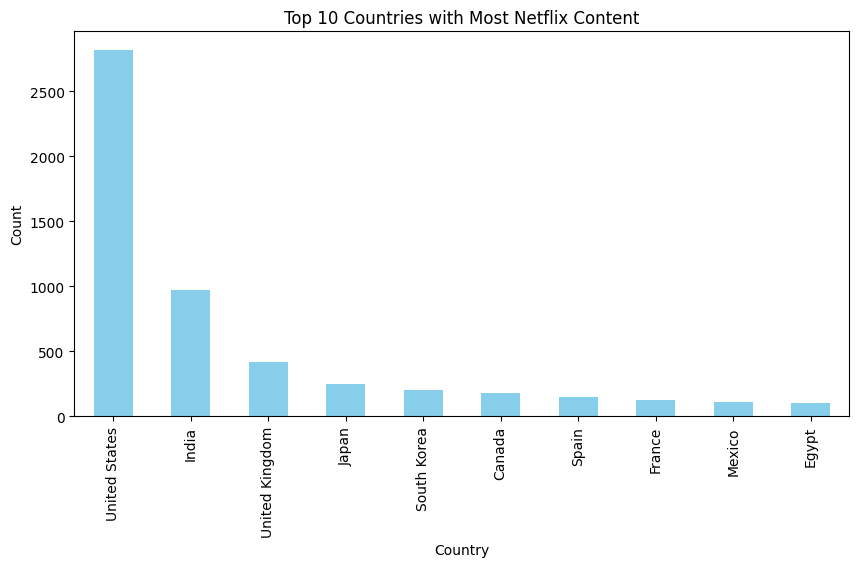

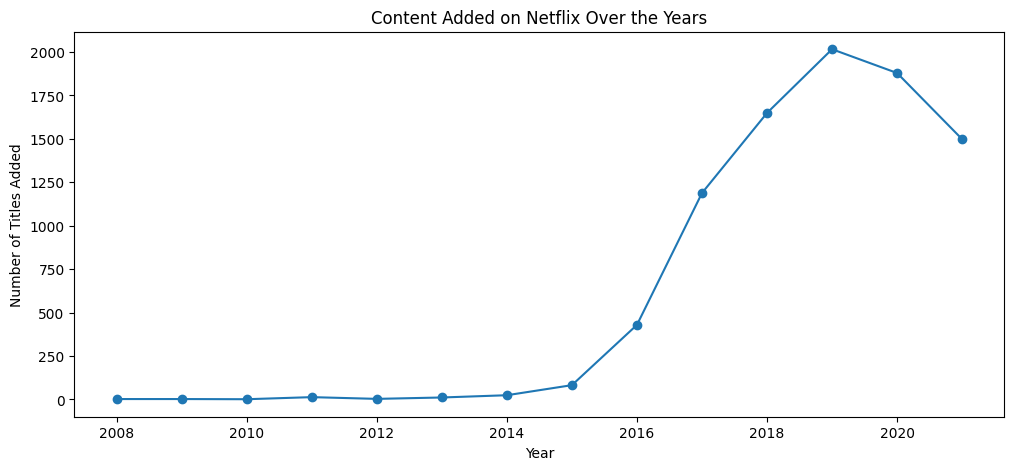

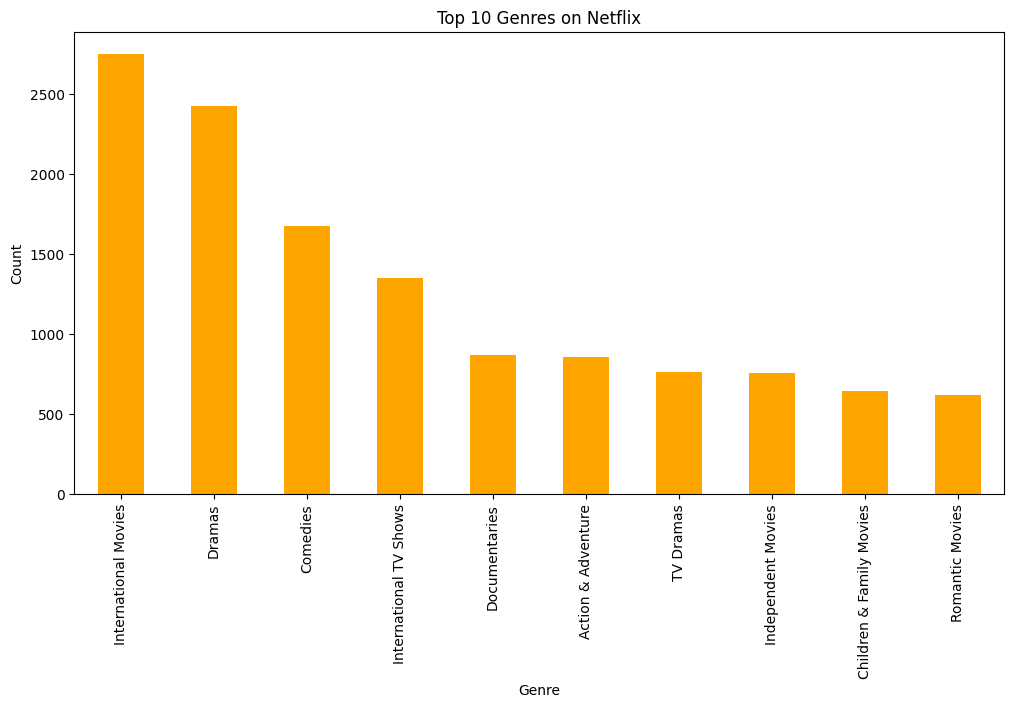

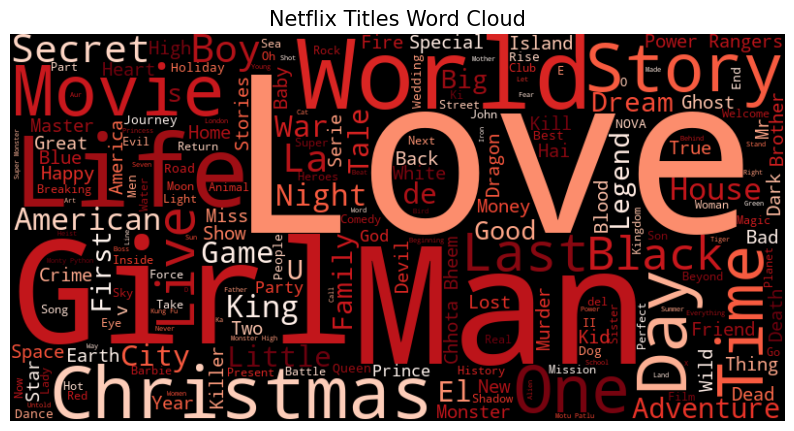


 KEY INSIGHTS:
1. Movies are more common than TV Shows on Netflix.
2. The US and India dominate Netflix’s content library.
3. Most content was added between 2015–2020 (rapid growth years).
4. Popular genres include International Movies, Dramas, and Comedies.
5. Word cloud shows common keywords in Netflix titles.


In [1]:
# Netflix Movies & TV Shows Analysis Project

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load dataset
df = pd.read_csv("netflix_titles.csv")

# Basic info
print("Dataset shape:", df.shape)
print(df.head())

# Clean data
df = df.drop_duplicates()
df = df.dropna(subset=["type", "title"])

# --- Content type split (Movies vs TV Shows) ---
plt.figure(figsize=(6,6))
df["type"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["#FF5A5F", "#00A699"])
plt.title("Distribution of Movies vs TV Shows on Netflix")
plt.ylabel("")
plt.show()

# --- Top 10 countries with most content ---
plt.figure(figsize=(10,5))
df["country"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

# --- Content added per year ---
df["date_added"] = df["date_added"].astype(str).str.strip()  # remove leading spaces
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
df["year_added"] = df["date_added"].dt.year

plt.figure(figsize=(12,5))
df["year_added"].value_counts().sort_index().plot(kind="line", marker="o")
plt.title("Content Added on Netflix Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.show()

# --- Top 10 genres (from 'listed_in') ---
all_genres = []
for genre_list in df["listed_in"].dropna():
    all_genres.extend(genre_list.split(", "))
genre_series = pd.Series(all_genres)

plt.figure(figsize=(12,6))
genre_series.value_counts().head(10).plot(kind="bar", color="orange")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

# --- Word Cloud of Titles ---
plt.figure(figsize=(10,7))
title_wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(" ".join(df["title"].dropna()))
plt.imshow(title_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Netflix Titles Word Cloud", fontsize=15)
plt.show()

# --- Key Insights (print to console) ---
print("\n KEY INSIGHTS:")
print("1. Movies are more common than TV Shows on Netflix.")
print("2. The US and India dominate Netflix’s content library.")
print("3. Most content was added between 2015–2020 (rapid growth years).")
print("4. Popular genres include International Movies, Dramas, and Comedies.")
print("5. Word cloud shows common keywords in Netflix titles.")
